## 导数和微分

假设我们有一个函数 $f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。(**$f$ 的 *导数* 被定义为**)

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$$**)

* $DC = 0$ （$C$ 是一个常数）
* $Dx^n = nx^{n-1}$ （*幂律*（power rule）, $n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$


## 梯度

![](img/gradient_transform_example.png)
![](img/gradient_transform.png)


假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有 $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵 $\mathbf{X}$，我们都有 $\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

证明：http://www.sfu.ca/~haiyunc/notes/matrix_calculus.pdf

![](img/X^TAX.png)

## 链式法则

让我们先考虑单变量函数。假设函数 $y=f(u)$ 和 $u=g(x)$ 都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

现在让我们把注意力转向一个更一般的场景，即函数具有任意数量的变量的情况。假设可微分函数 $y$ 有变量 $u_1, u_2, \ldots, u_m$，其中每个可微分函数 $u_i$ 都有变量 $x_1, x_2, \ldots, x_n$。注意，$y$是 $x_1, x_2， \ldots, x_n$ 的函数。对于任意 $i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$

In [1]:
# f(x) = 3x^2 - 4x
def f(x):
    return 3 * x ** 2 - 4 * x

In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

In [3]:
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [4]:
import numpy as np
from IPython import display
from d2l import torch as d2l
import matplotlib_inline.backend_inline
# %matplotlib inline

In [5]:
def use_svg_display():  
    """使用svg格式在Jupyter中显示绘图。"""
#     display.set_matplotlib_formats('svg') # Deprecated since version 7.23
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  
    """设置matplotlib的图表大小。"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

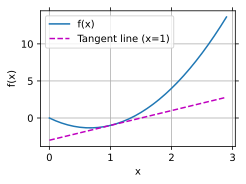

In [6]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 练习

1. 绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。

2. 求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

3. 函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？

4. 你可以写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则吗?

In [7]:
def f(x):
    return x ** 3 - 1 / x

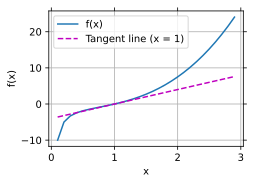

In [8]:
# 1.
x = np.arange(0, 3, 0.1)[1:]
plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x = 1)'])

2. [$6x_1$, $5e^{x_2}$]

3. $\frac{1}{\|\mathbf{x}\|} \mathbf{X}$

4. $$\frac{du}{da} = \frac{du}{dx}\frac{dx}{da} + \frac{du}{dy}\frac{dy}{da} + \frac{du}{dz}\frac{dz}{da}\\
\frac{du}{db} = \frac{du}{dx}\frac{dx}{db} + \frac{du}{dy}\frac{dy}{db} + \frac{du}{dz}\frac{dz}{db}$$
